# sector 10


In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s10.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

392532 after maybeTransit, 47.240705772764855% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
3,/tmp/tess/tesslcs_sector_10_104/tesslcs_tmag_1...,72866262,-6.40539,-2.95415,1592.80718,1.00000,0.00000,275.31289,-29.99975,0.00000,...,1025.71047,1025.71047,3.85605,3.85605,0.00080,0.00080,0.00065,0.00065,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
4,/tmp/tess/tesslcs_sector_10_104/tesslcs_tmag_1...,305126704,-8.04035,-4.27801,1588.09758,1.06033,0.00059,0.33697,-30.00000,73.05872,...,374.84911,353.56947,2.92851,2.76226,0.00064,0.00062,0.00048,0.00047,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
5,/tmp/tess/tesslcs_sector_10_104/tesslcs_tmag_1...,131038911,-7.74775,-3.51259,1590.12035,1.03405,0.00044,0.29927,-19.00252,23.23121,...,301.09576,291.08997,2.73723,2.64627,0.00045,0.00044,0.00036,0.00034,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
11,/tmp/tess/tesslcs_sector_10_104/tesslcs_tmag_1...,15451811,-6.62921,-3.83199,1588.51515,1.02410,0.00061,0.47430,29.99996,61.21097,...,585.74149,571.25475,2.36186,2.30345,0.00066,0.00065,0.00052,0.00052,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
12,/tmp/tess/tesslcs_sector_10_104/tesslcs_tmag_1...,229756301,-8.76315,-2.60028,1578.32878,1.00019,0.00133,0.26506,0.83844,3.20953,...,1099.01724,1098.80876,7.23038,7.22900,0.00126,0.00126,0.00094,0.00094,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

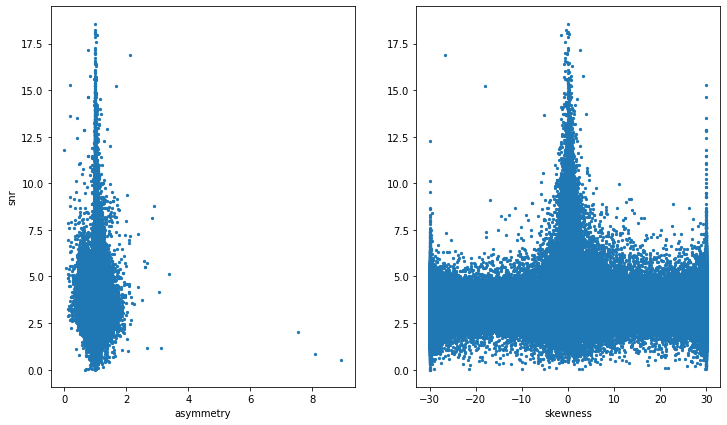

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

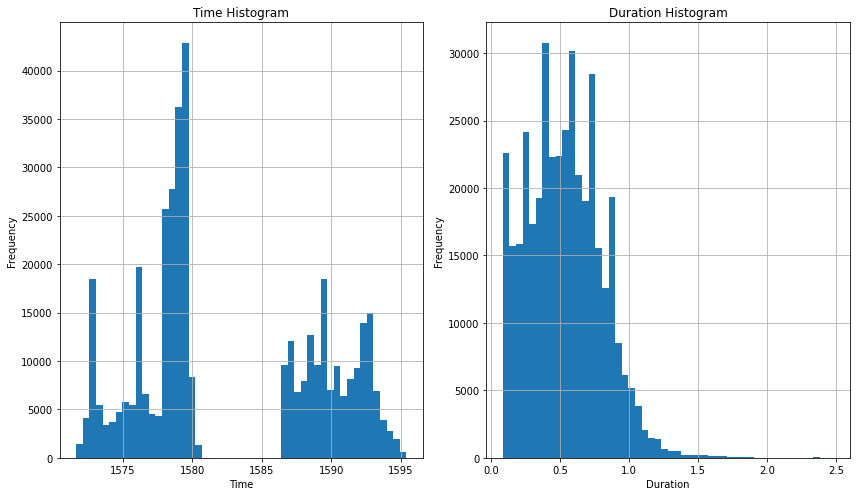

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

13951

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

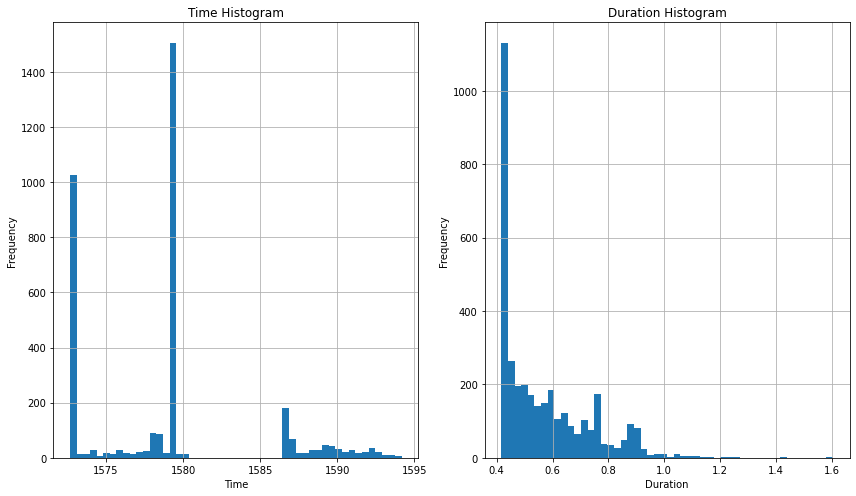

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

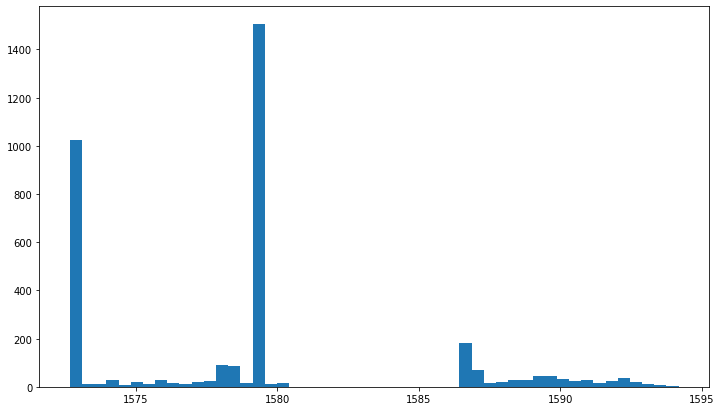

In [13]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [14]:
hist_values

array([1025.,   12.,   13.,   28.,    7.,   18.,   13.,   28.,   16.,
         12.,   20.,   23.,   89.,   88.,   17., 1504.,   13.,   14.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,  181.,   68.,   17.,   18.,
         29.,   27.,   45.,   43.,   33.,   22.,   28.,   17.,   22.,
         36.,   21.,   11.,    9.,    5.])

In [15]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [16]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1579.117346 start of bin
1579.5476964 end of bin
1504.0 number of lcs


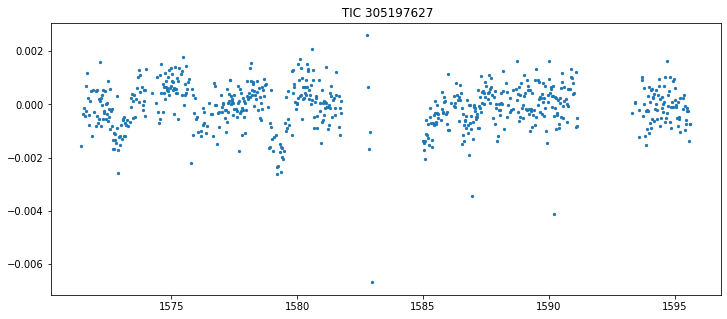

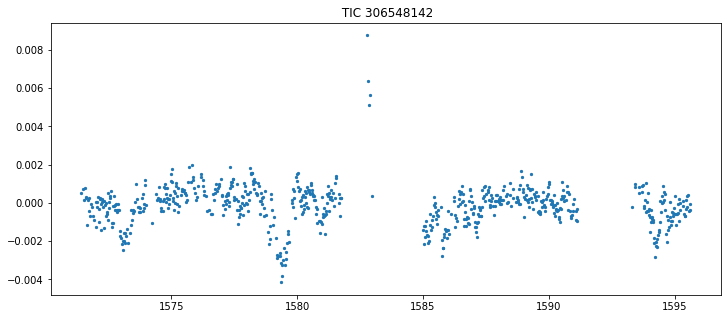

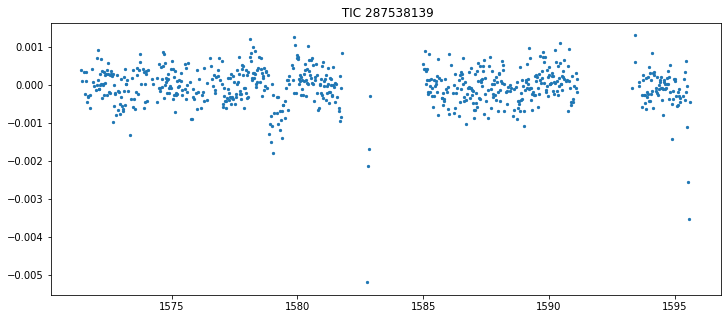

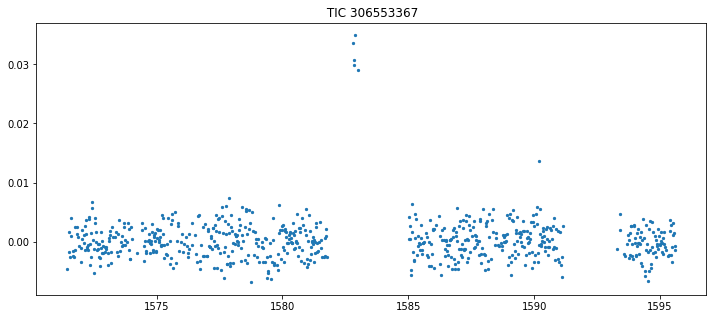

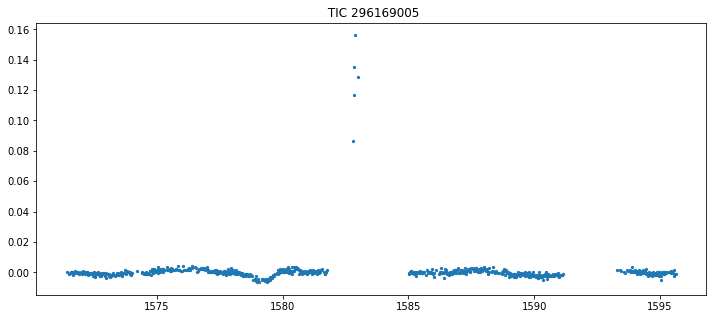

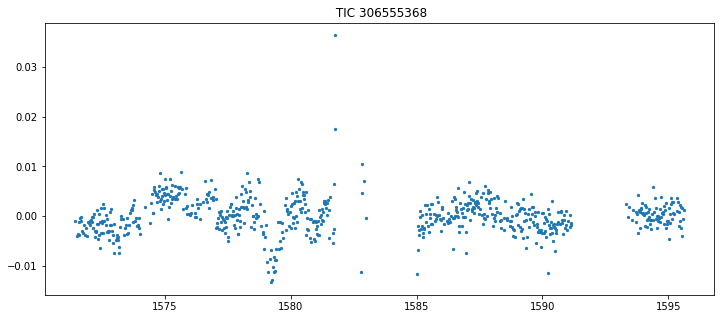

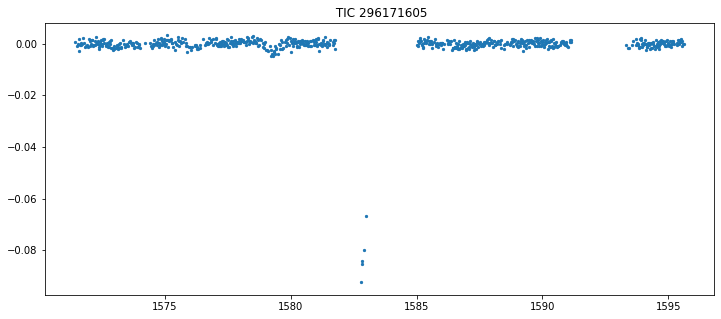

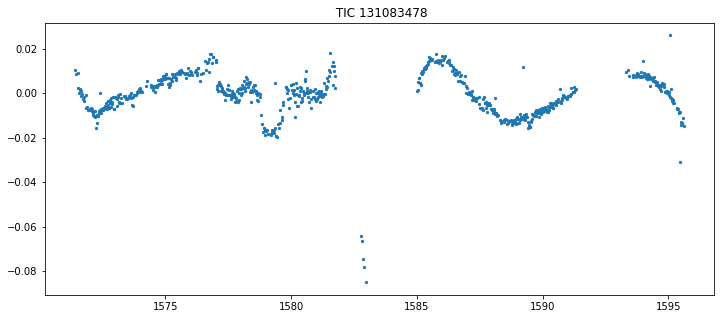

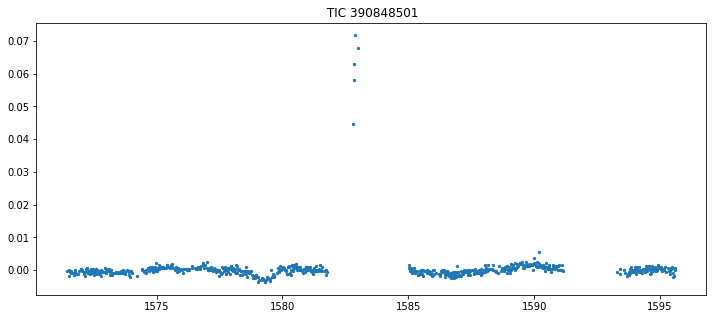

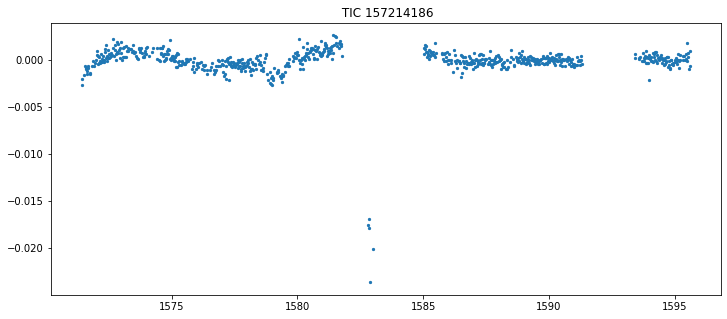

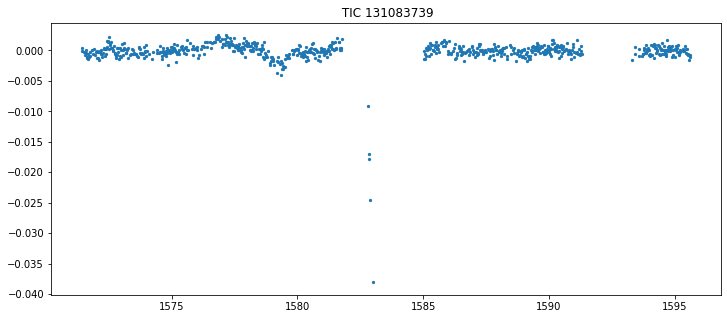

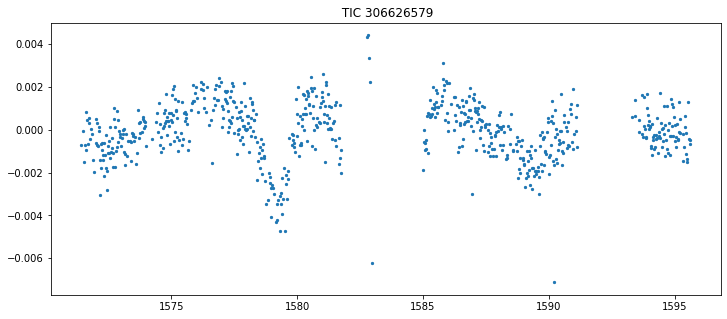

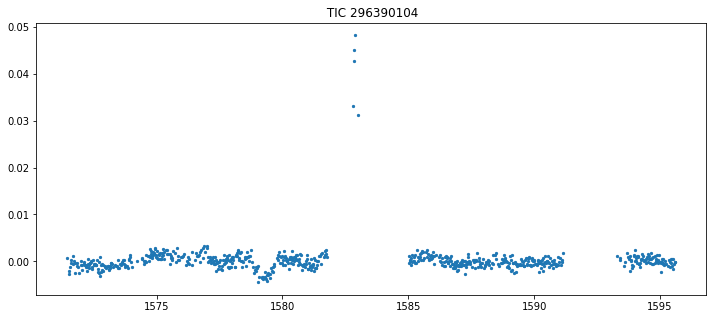

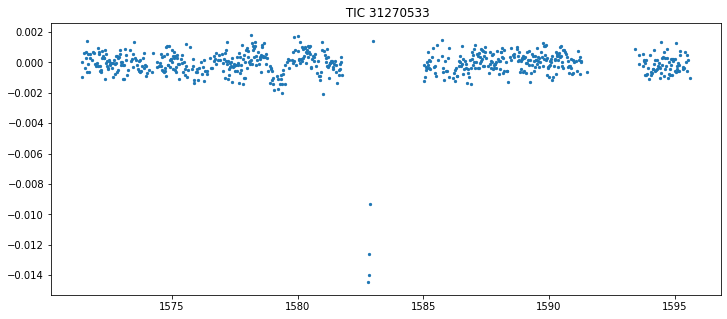

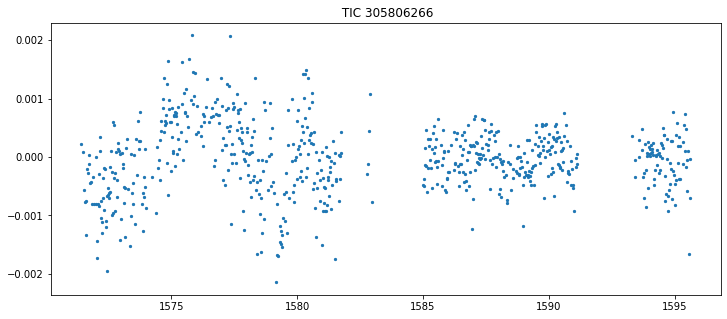

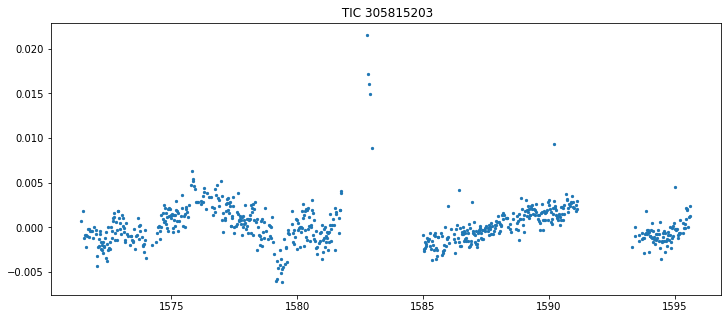

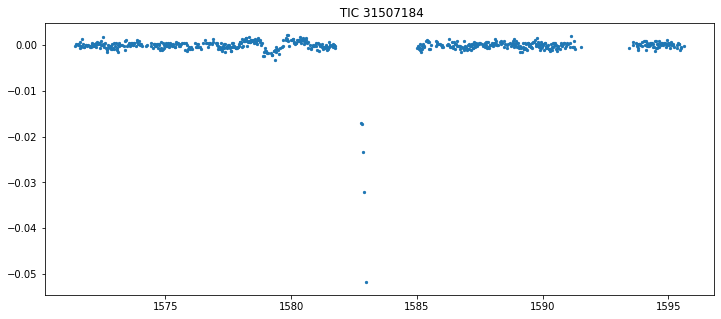

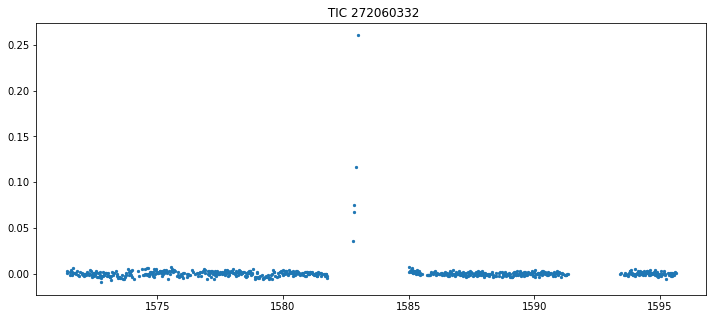

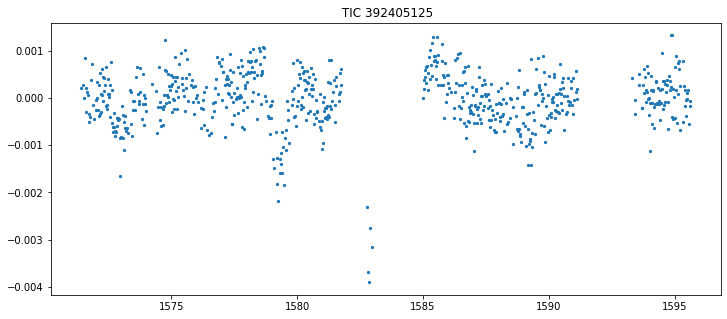

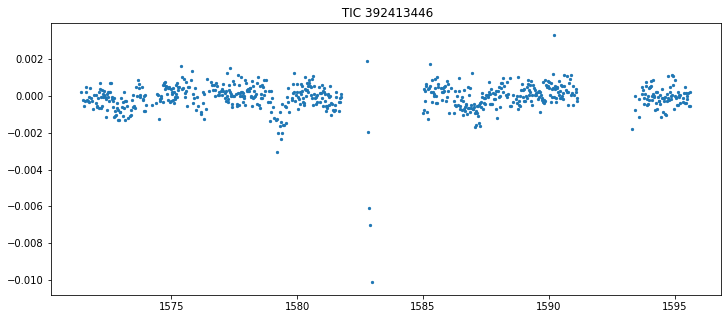

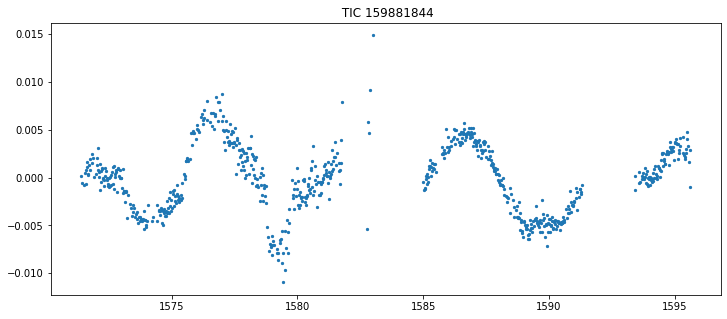

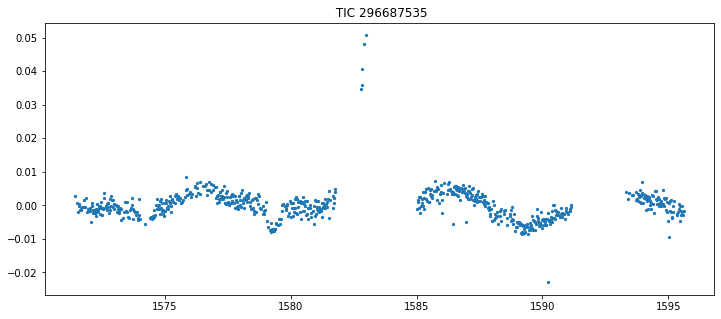

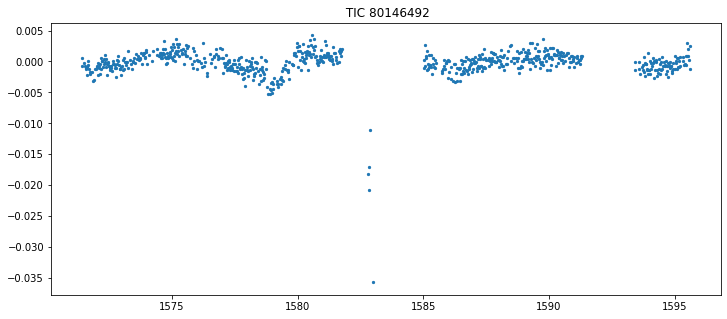

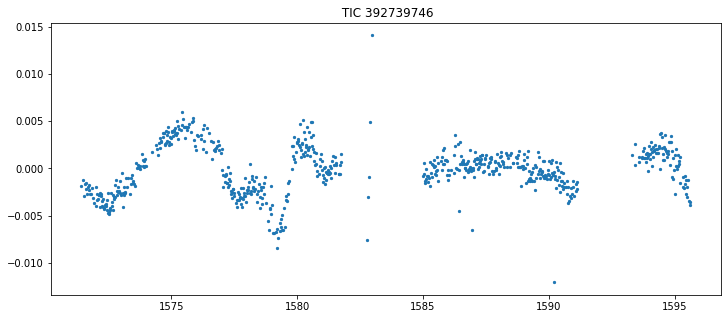

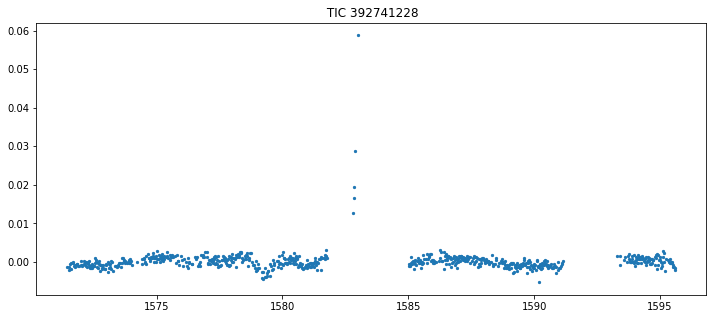

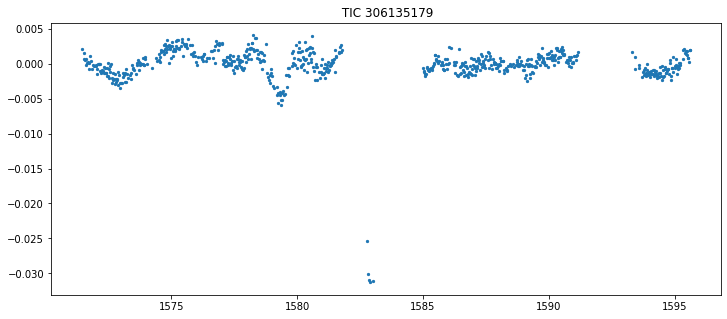

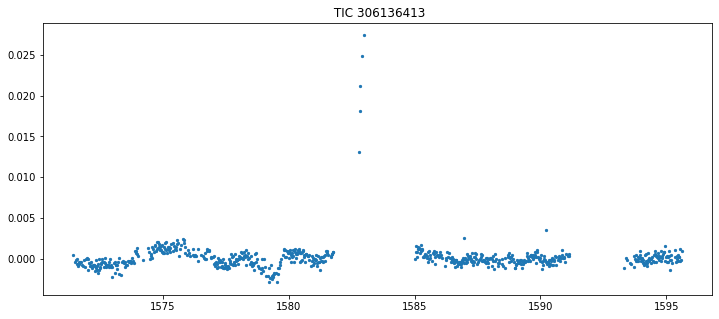

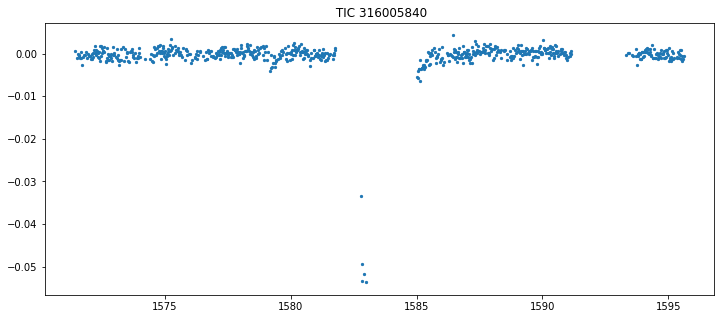

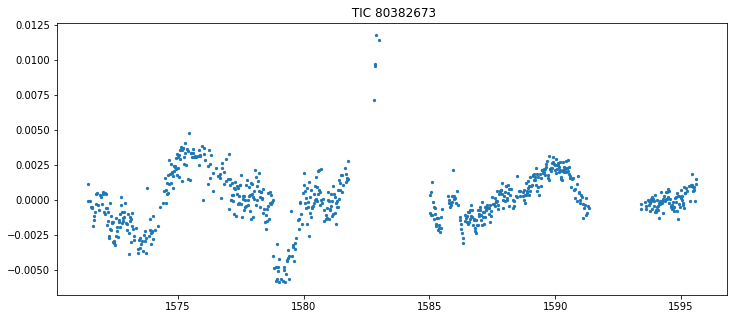

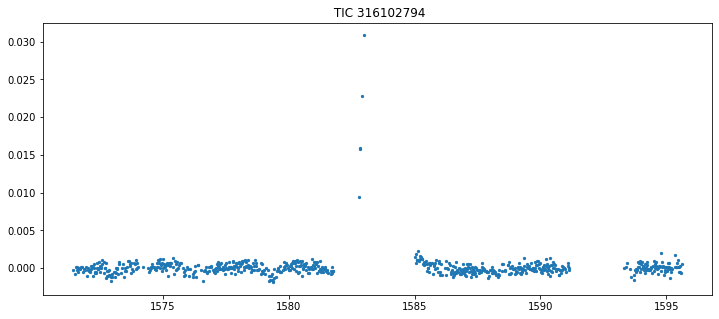

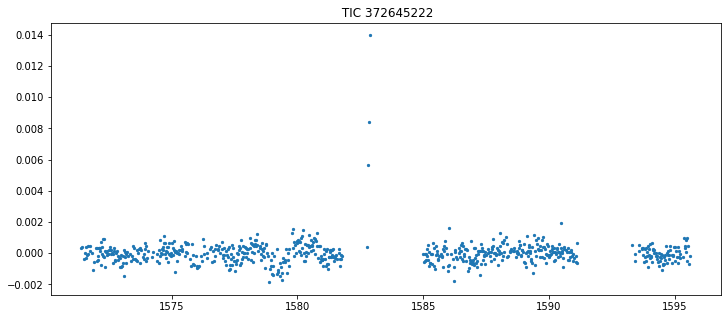

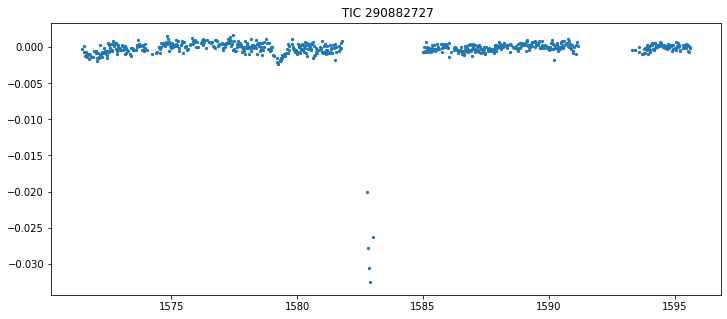

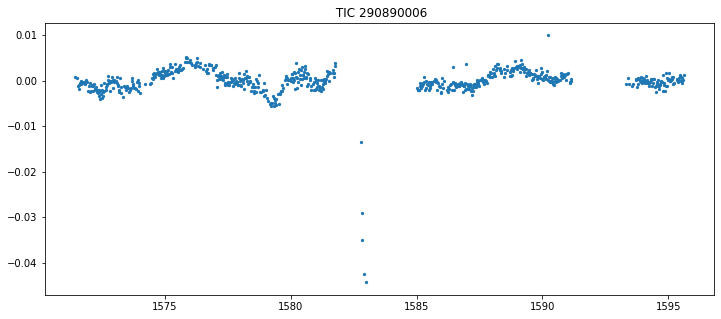

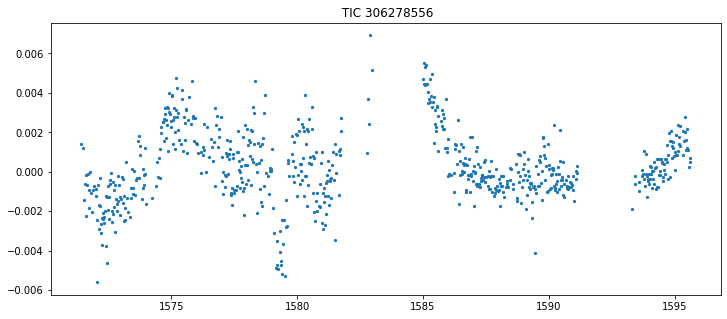

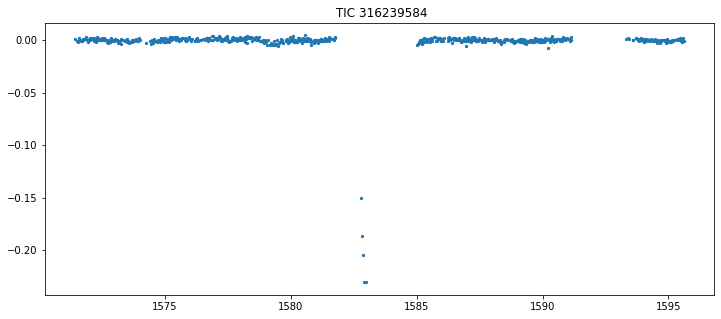

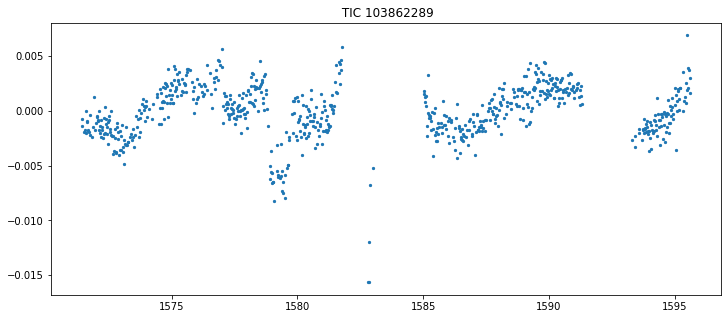

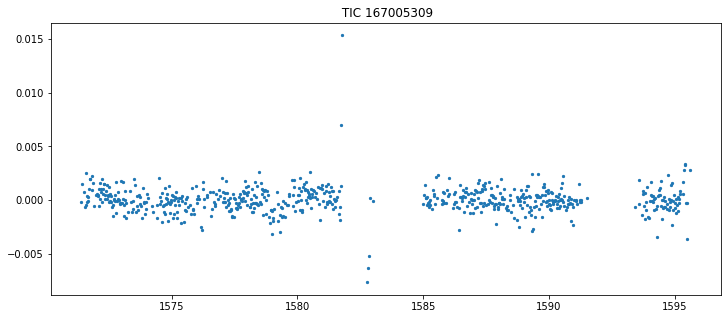

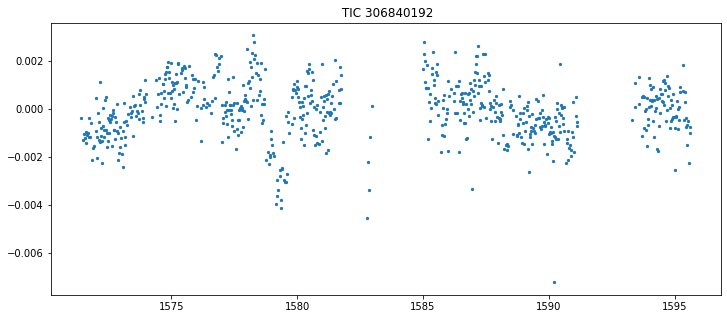

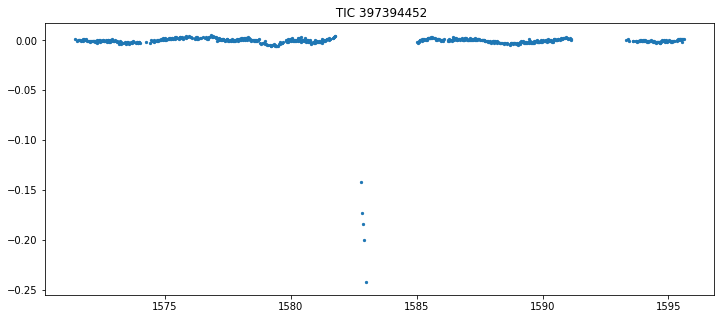

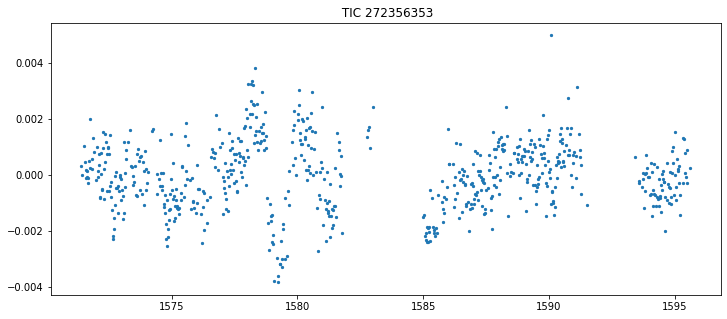

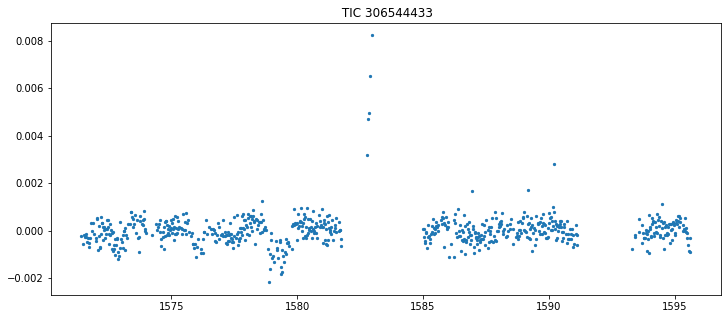

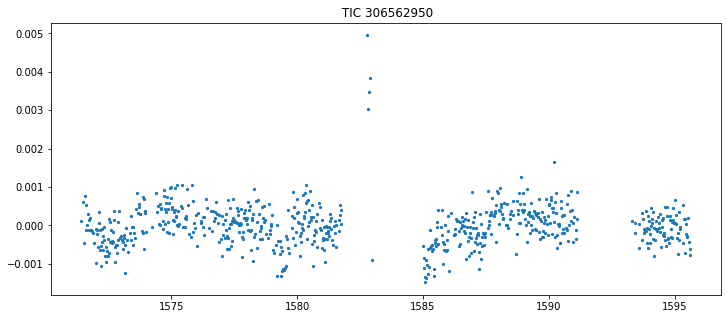

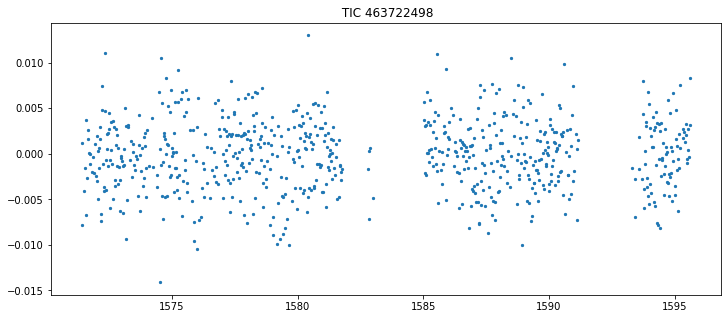

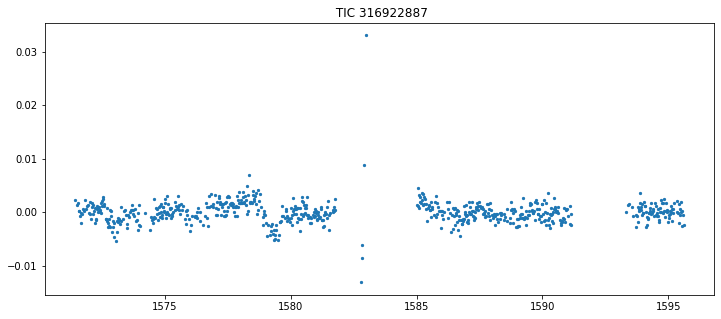

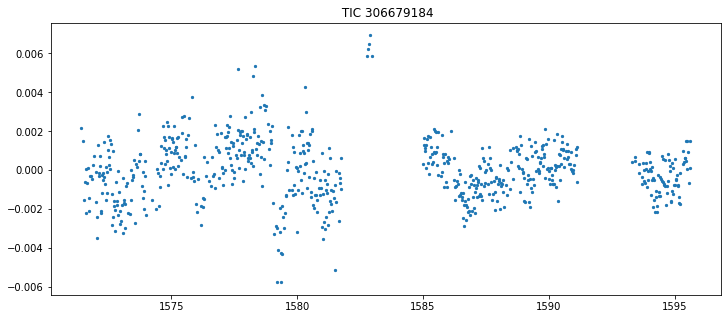

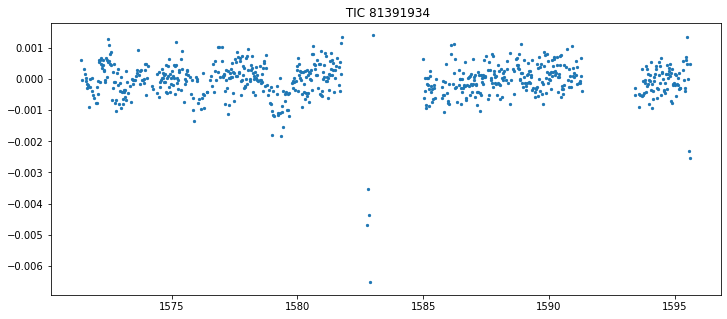

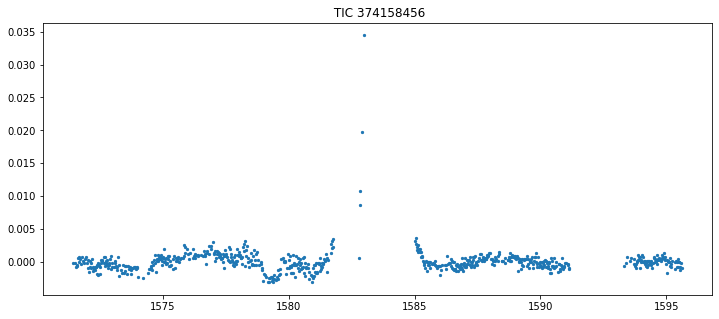

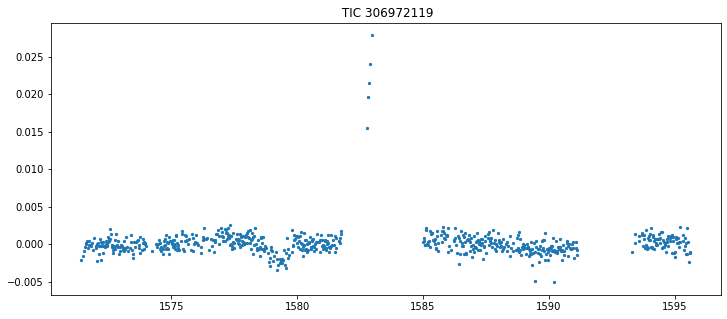

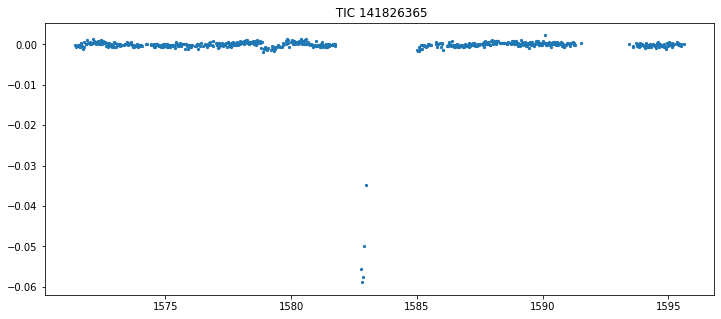

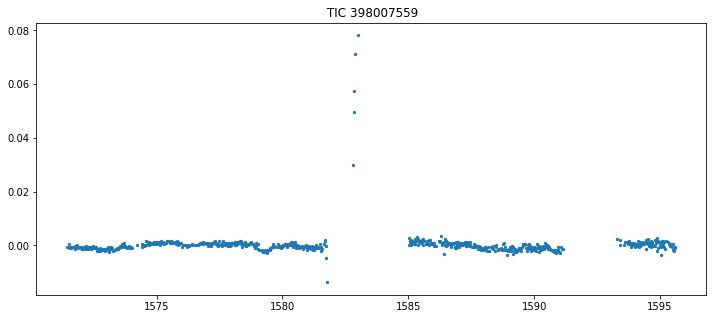

In [17]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()